In [1]:
import numpy as np 
import pandas as pd

data = pd.read_csv('RandData1.csv')

df = pd.DataFrame(data)

df.head()

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,how often do you make impulse purchases?,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on
0,21,0,1,0,5,10000,8000,4200,2100,1100,...,2,0,0,1,1400,2900,500,10000,1000,5
1,21,0,0,0,1,8000,5800,3700,1900,1300,...,1,0,0,0,200,1900,400,10000,3000,4
2,21,0,0,0,4,9000,2500,800,1800,2800,...,1,1,0,1,500,3600,500,4000,3000,4
3,22,1,0,1,1,5000,3100,200,1200,2100,...,1,0,0,1,600,3500,2300,7000,2000,5
4,19,0,0,2,3,7000,3400,4400,1500,2300,...,0,1,1,1,200,2100,2400,4000,5000,4


In [2]:
expenditure_columns = [
    'Monthly exp on transport', 
    'Monthly exp on food', 
    'Monthly exp on education', 
    'Recurring monthly payments(Subscriptions, plans ,recharge etc.)', 
    'Expenses on fresh groceries and whole foods.', 
    'expenses on online takeout', 
    'expenditure on medicine', 
    'expenses on outings', 
    'tax payments'
]

data['Monthly Expenditure'] = data[expenditure_columns].sum(axis=1)

In [3]:
#made 2 categories of data : numerics features and categoric features

features = data.drop('Monthly Expenditure', axis=1)
target = data['Monthly Expenditure']

numeric_features = ['Age', 'Monthly pocketmoney', 'Monthly exp on transport', 'Monthly exp on food', 
                    'Monthly exp on education', 'Debt', 'Monthly savings', 'Expenses on fresh groceries and whole foods.',
                    'expenses on online takeout', 'expenditure on medicine', 'expenses on outings', 'tax payments']

categorical_features = ['Gender', 'Place of Stay', 'Relationship status', 'notable investments',
                        'Financial goals', 'Do you follow a monthly budget ?', 'how often do u dine out?',
                        'how often do you make impulse purchases?', 'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
                        'how comfortable are you with taking financial risk in your investments', 'Do you use any mobile apps or online platforms to manage your finances and investments',
                        'what types of food do u spen money on']

In [4]:
#preprocessing both categoric and numeric data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [5]:
# combining models and fitting

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(y_pred)

[17812.89404733 25209.03352537 29273.62016063 27773.40247721
 24168.83211735 18881.17271581 20812.8300174  20117.4927272
 22163.17812665 16396.833643   16485.94651029 22293.67188122
 21594.37666576 19351.20176676 14894.0311728  22273.61055593
 20829.49816013 25264.62495854 18360.5129235  19560.96350989
 22739.57536394 16893.76244229 11746.33830742 19225.32098535
 13505.13797677 13835.49378681 14714.75819464 15663.86217897
 15517.40490025 22378.15058779 15137.42677815 18694.91806334
 29269.79543188 22425.97564719 12306.37045833  6325.4662721
 23607.43987744 15536.33233541 18524.98143532 11628.44986774
 20506.88836261 15350.95304729 30485.5728213  14014.77511998
 19613.86518609 18909.7033985  23907.76506425 16778.8852444
 17815.68605918 19033.40620588 20519.59391404 23096.26514009
 20185.34415277 16884.23243889 27984.35189392 17396.0441408
 24056.29220129 21162.14255832  9984.91215289 18772.74136944]


In [6]:
#Evalutaion metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test, y_test)

mae, mse, r_squared

(891.3157002035011, 1174897.1197874073, 0.9465529628017157)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

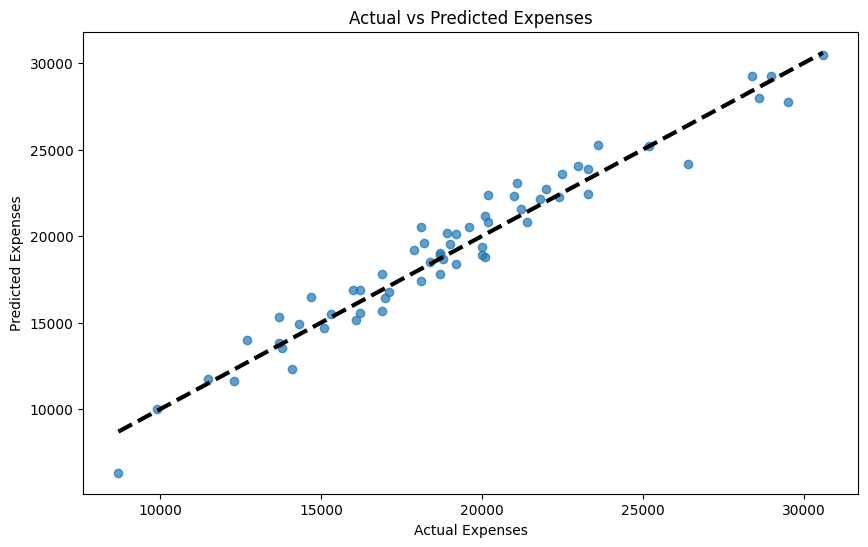

In [8]:
#plot for actual vs predicted savings

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs Predicted Expenses')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

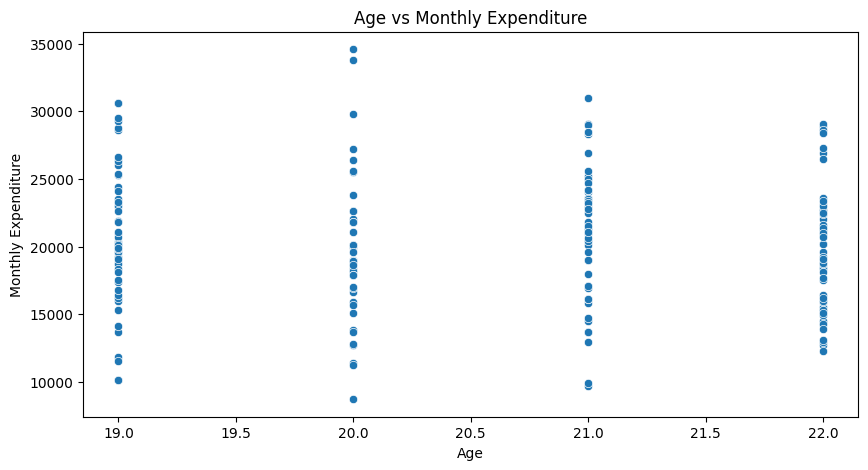

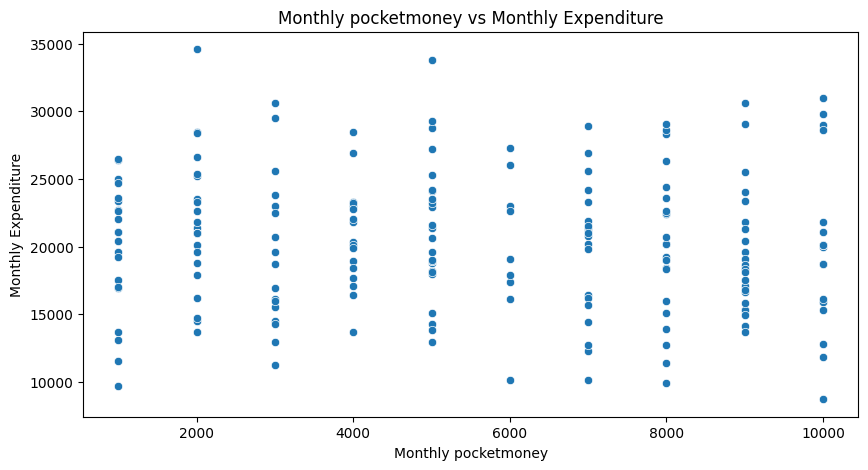

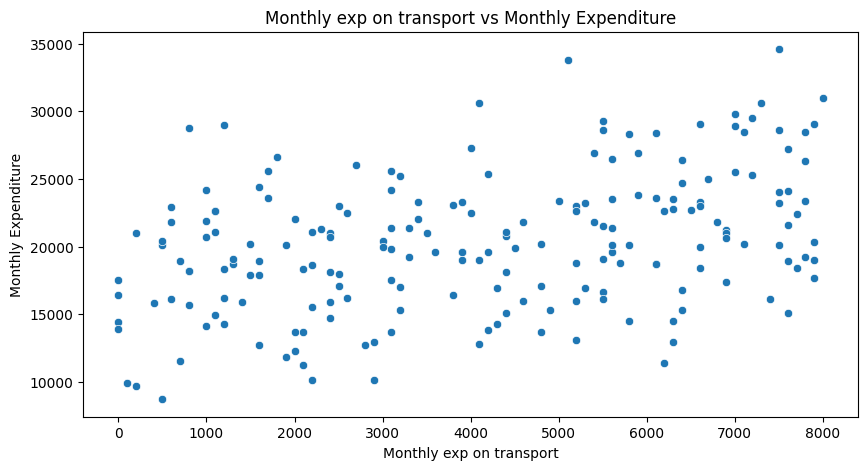

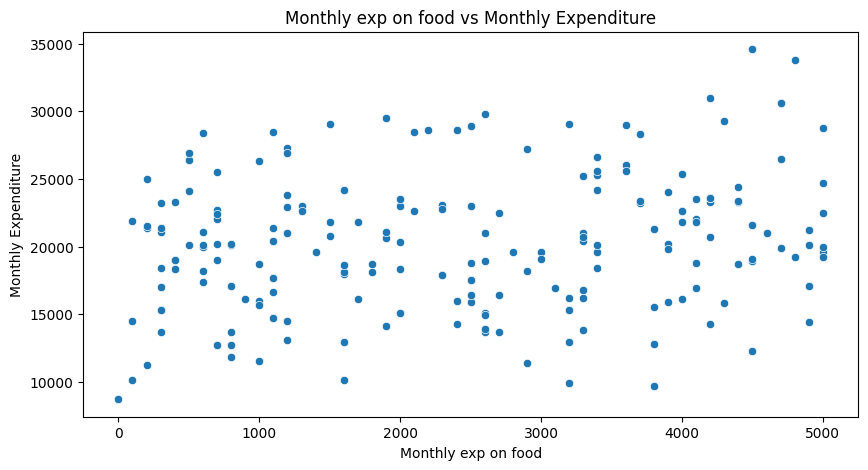

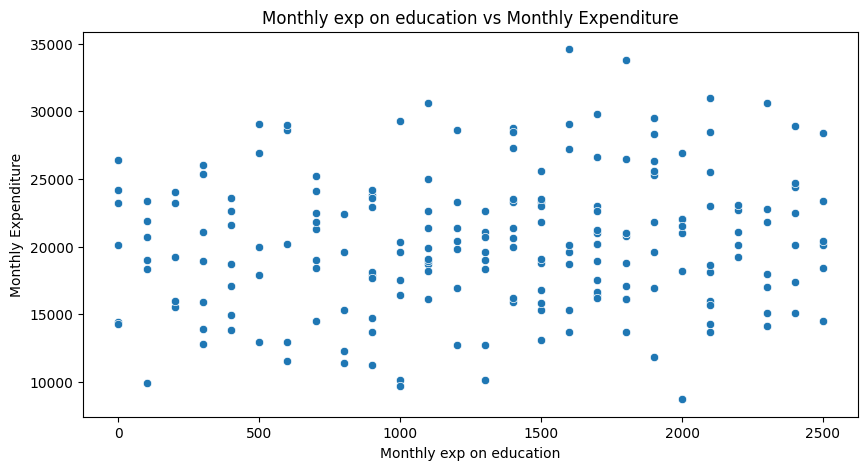

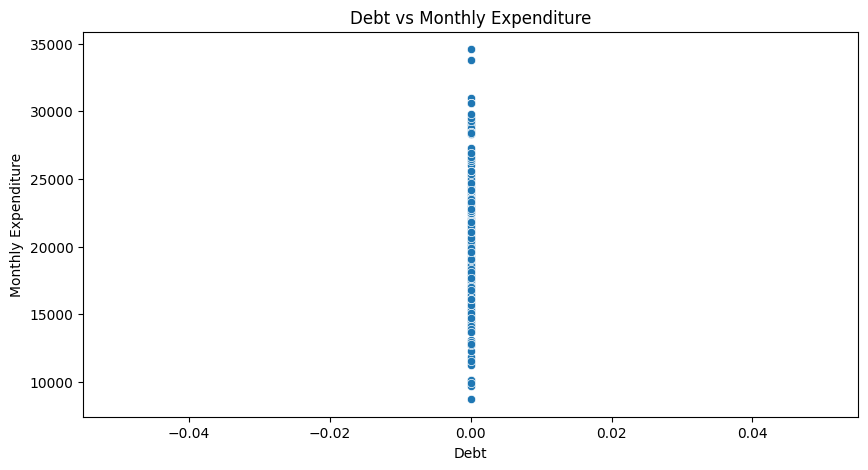

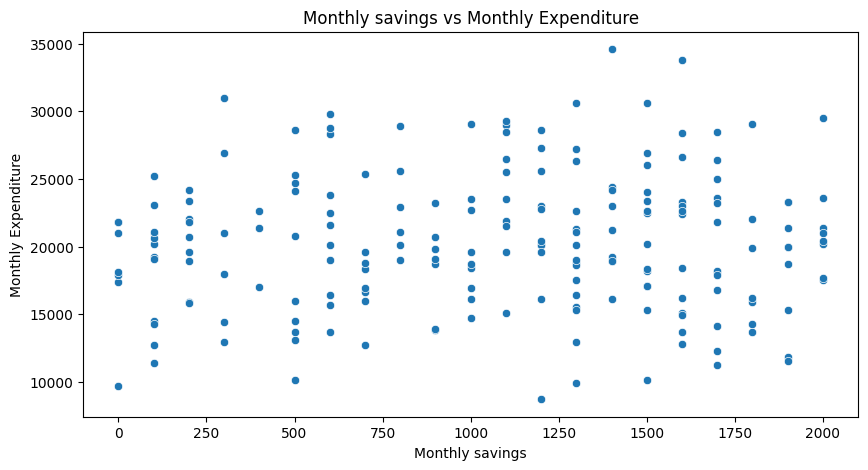

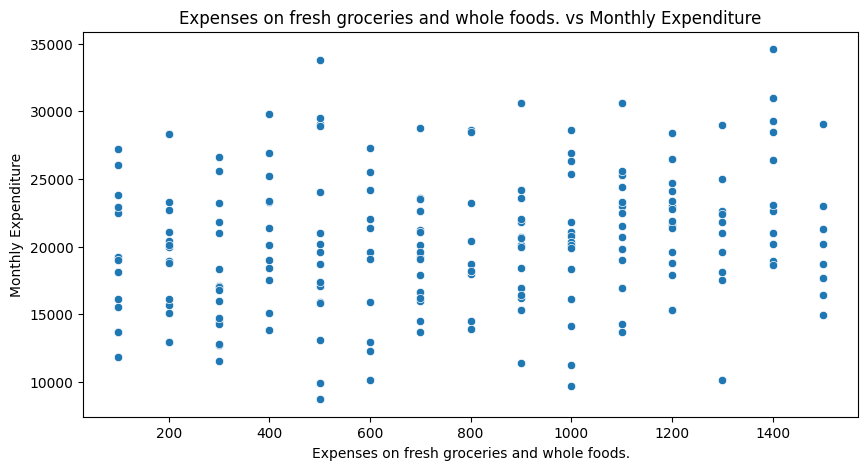

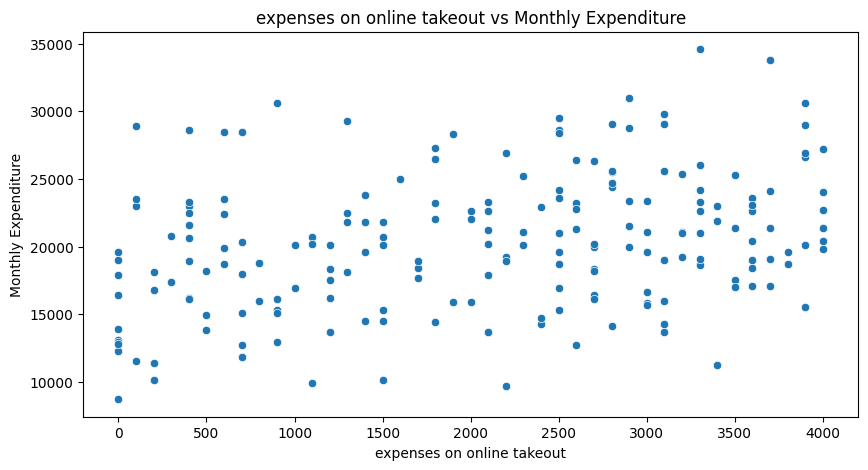

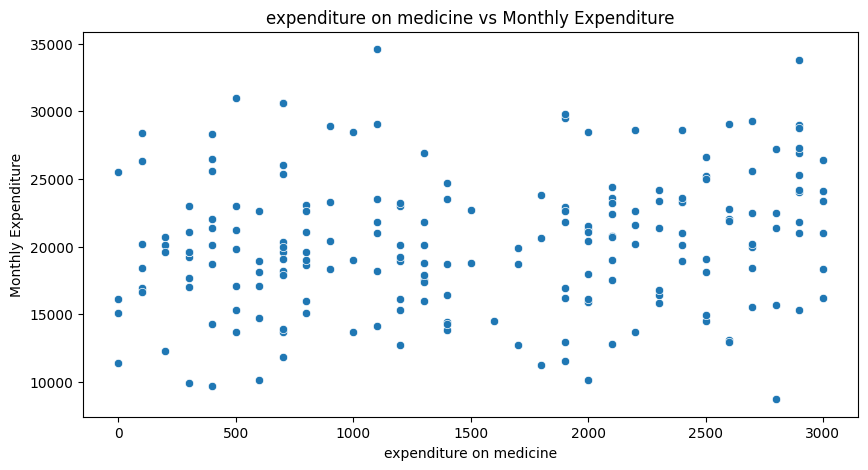

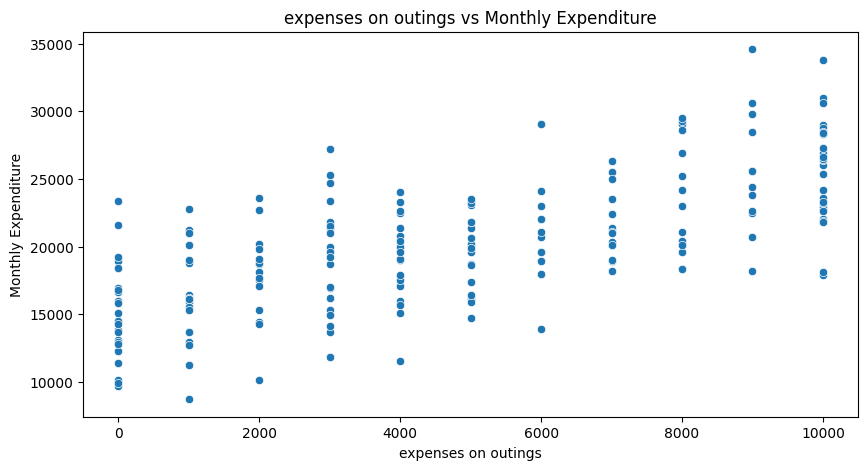

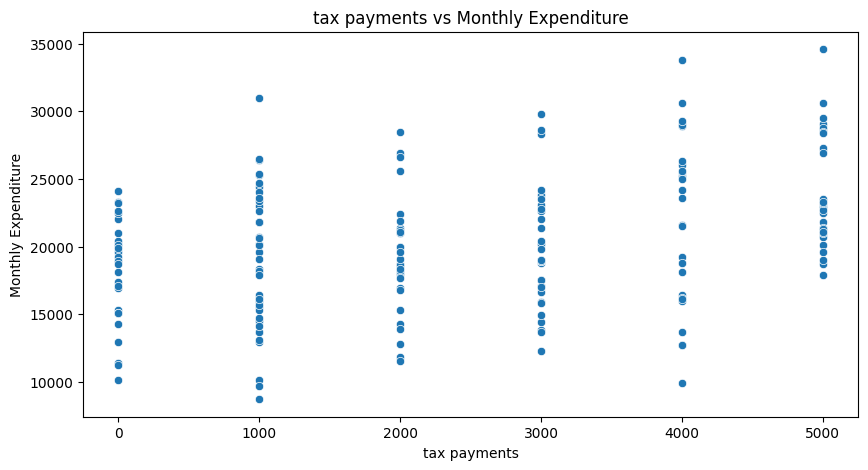

In [8]:
# scatter plot for numerical features against the target variable

for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data[feature], y=target)
    plt.title(f'{feature} vs Monthly Expenditure')
    plt.show()

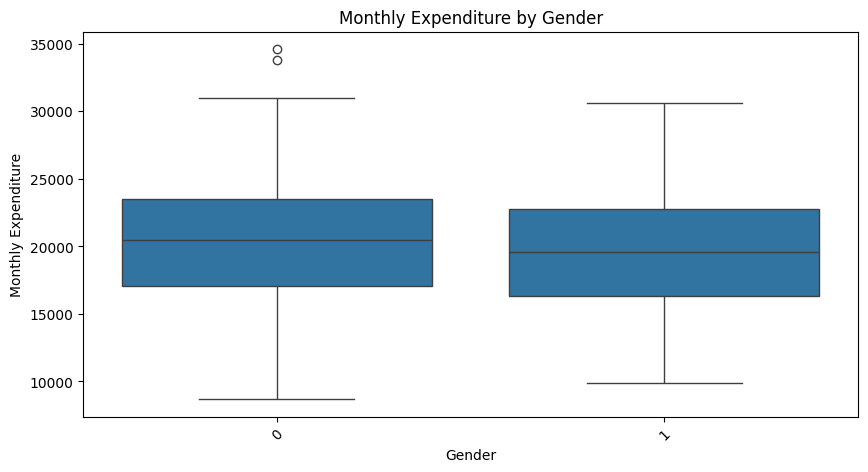

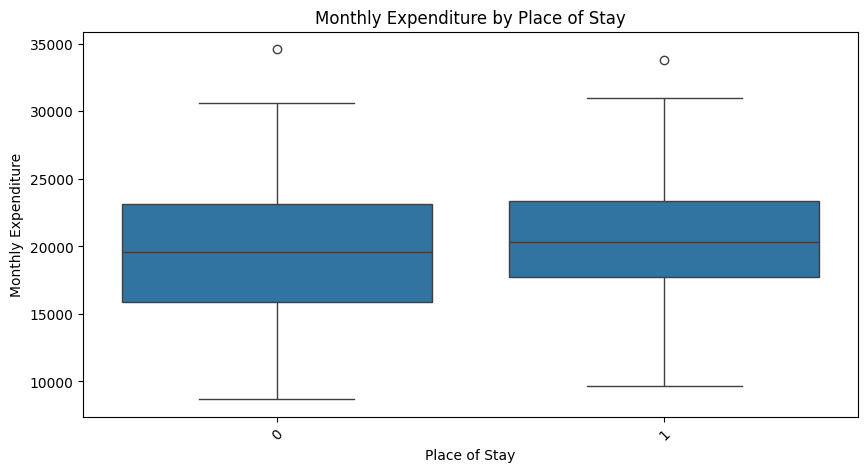

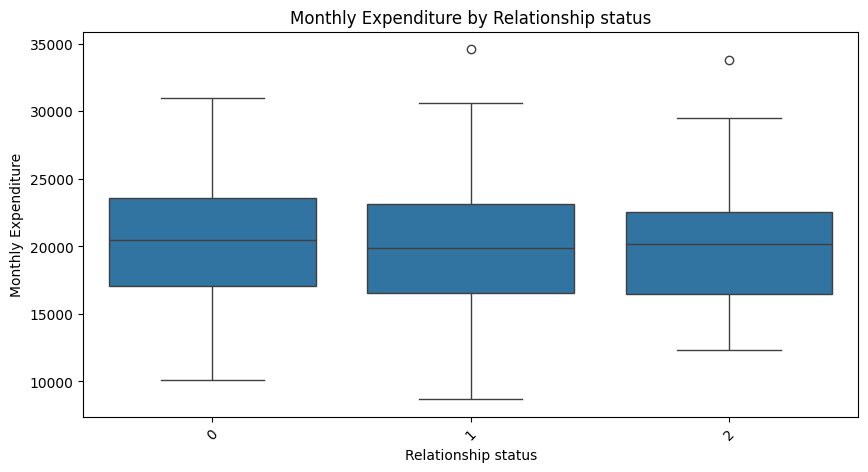

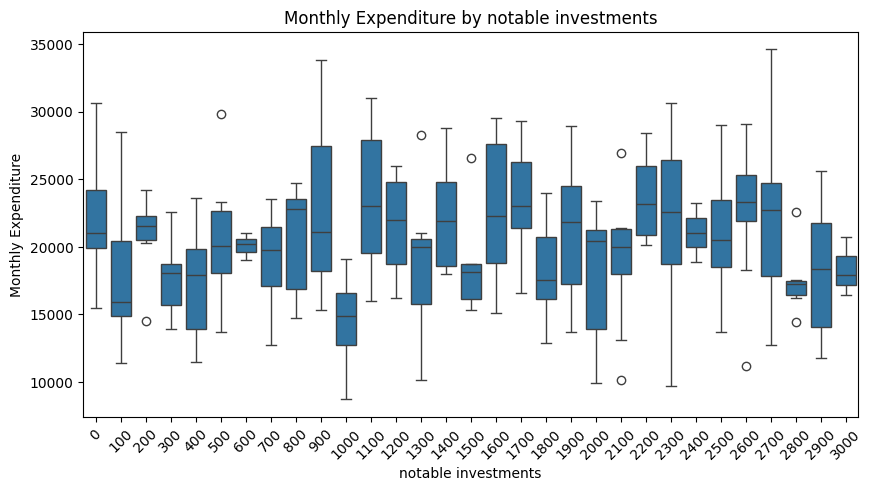

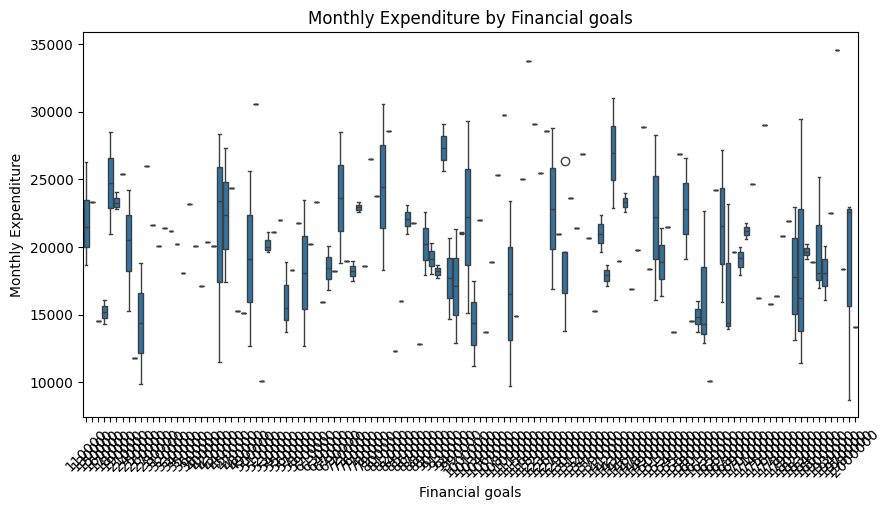

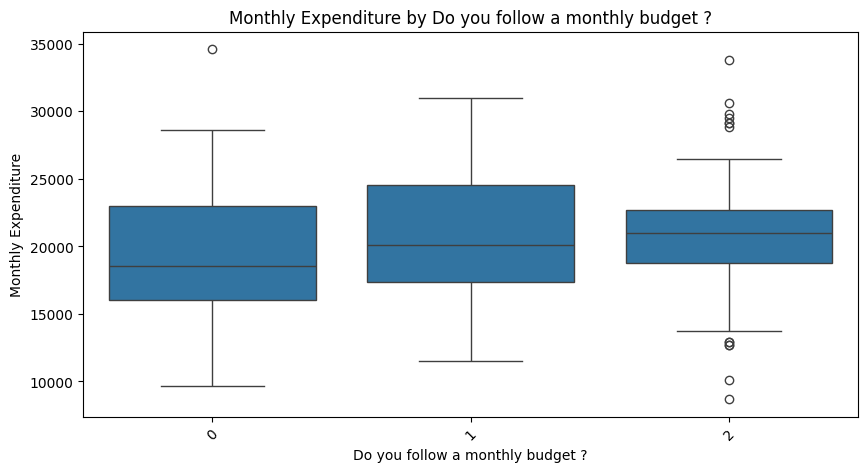

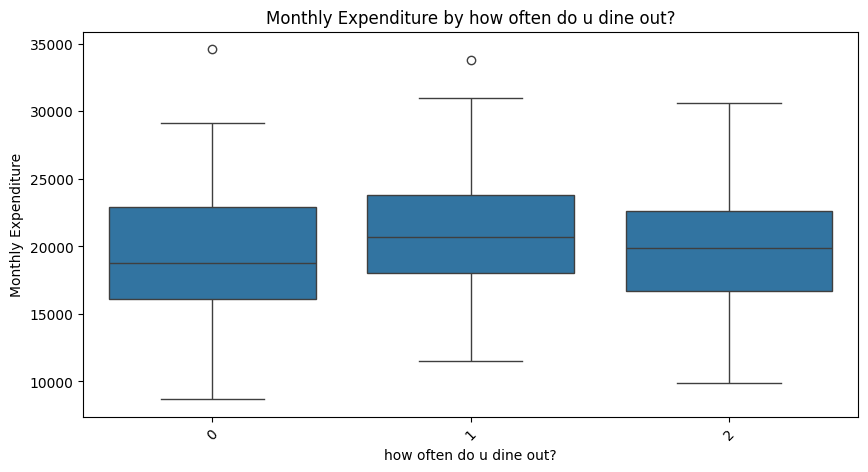

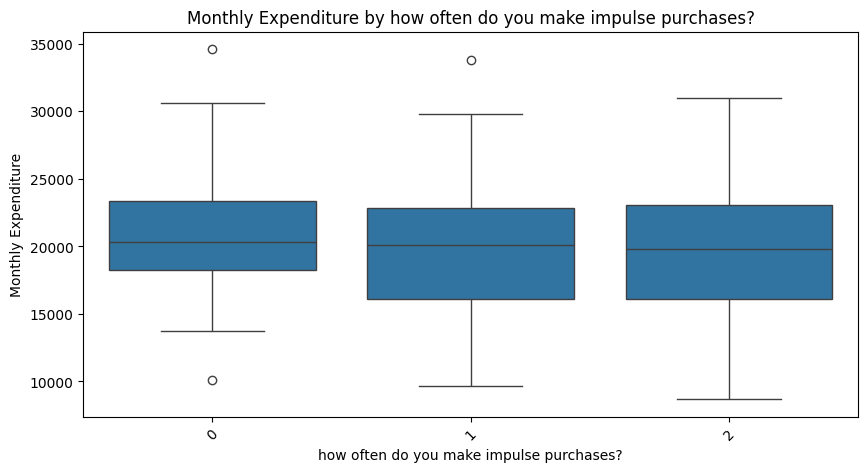

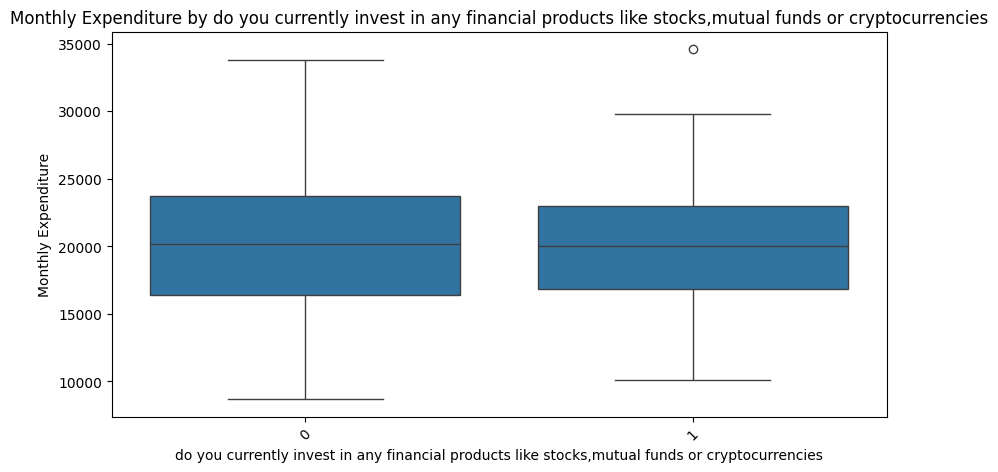

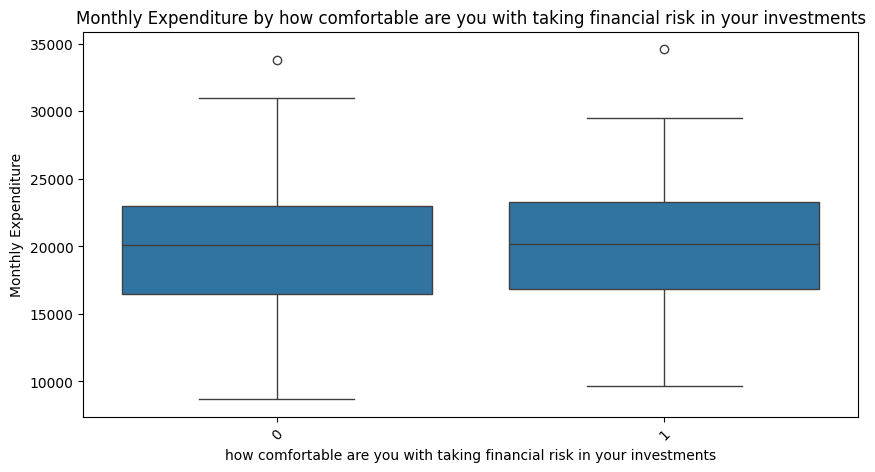

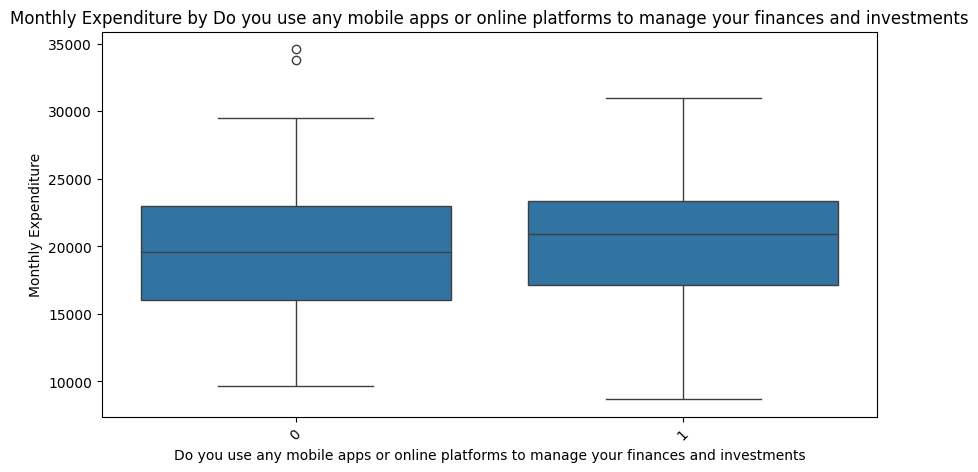

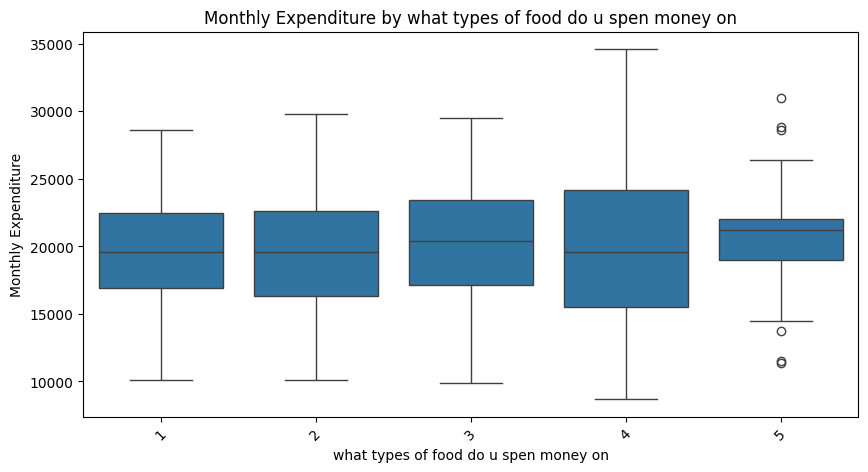

In [9]:
#graph for Monthly expenditure vs all categorical datas

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature], y=target)
    plt.title(f'Monthly Expenditure by {feature}')
    plt.xticks(rotation=45)
    plt.show()

Now that the model is trained and tested using Linear Regression , now lets build a custom model for the same for playing with it any user input

In [10]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Monthly pocketmoney',
                                                   'Monthly exp on transport',
                                                   'Monthly exp on food',
                                                   'Monthly exp on education',
                                                   'Debt', 'Monthly savings',
                                                   'Expenses on fresh '
                                                   'groceries and whole foods.',
                                                   'expenses on online takeout',
                                                   'expenditure on medicine',
                                                   'expenses on outings',
                                                   '...
                                                   'how often do you make '
                                                   'impulse purchases?',
                                                   'do you currently invest in '
                                                   'any financial products '
                                                   'like stocks,mutual funds '
                                                   'or cryptocurrencies',
                                                   'how comfortable are you '
                                                   'with taking financial risk '
                                                   'in your investments',
                                                   'Do you use any mobile apps '
                                                   'or online platforms to '
                                                   'manage your finances and '
                                                   'investments',
                                                   'what types of food do u '
                                                   'spen money on'])])),
                ('regressor', LinearRegression())])

In [11]:
model.score(X_test,y_test)

0.9465529628017157

In [12]:
import joblib

joblib.dump(model,'Expense_prediction.pkl')

['Expense_prediction.pkl']

In [13]:
model = joblib.load('Expense_prediction.pkl')
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Monthly pocketmoney',
                                                   'Monthly exp on transport',
                                                   'Monthly exp on food',
                                                   'Monthly exp on education',
                                                   'Debt', 'Monthly savings',
                                                   'Expenses on fresh '
                                                   'groceries and whole foods.',
                                                   'expenses on online takeout',
                                                   'expenditure on medicine',
                                                   'expenses on outings',
                                                   '...
                                                   'how often do you make '
                                                   'impulse purchases?',
                                                   'do you currently invest in '
                                                   'any financial products '
                                                   'like stocks,mutual funds '
                                                   'or cryptocurrencies',
                                                   'how comfortable are you '
                                                   'with taking financial risk '
                                                   'in your investments',
                                                   'Do you use any mobile apps '
                                                   'or online platforms to '
                                                   'manage your finances and '
                                                   'investments',
                                                   'what types of food do u '
                                                   'spen money on'])])),
                ('regressor', LinearRegression())])

In [14]:
df.columns

Index(['Age', 'Gender', 'Place of Stay', 'Relationship status',
       'No of dependents', 'Monthly pocketmoney', 'Monthly exp on transport',
       'Monthly exp on food', 'Monthly exp on education',
       'notable investments',
       'Recurring monthly payments(Subscriptions, plans ,recharge etc.)',
       'Debt', 'Monthly savings', 'Financial goals',
       'Do you follow a monthly budget ?', 'how often do u dine out?',
       'how often do you make impulse purchases?',
       'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
       'how comfortable are you with taking financial risk in your investments',
       'Do you use any mobile apps or online platforms to manage your finances and investments',
       'Expenses on fresh groceries and whole foods.',
       'expenses on online takeout', 'expenditure on medicine',
       'expenses on outings', 'tax payments',
       'what types of food do u spen money on'],
      dtype='object')

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
dfl = list(df.columns)

In [17]:
dfl

['Age',
 'Gender',
 'Place of Stay',
 'Relationship status',
 'No of dependents',
 'Monthly pocketmoney',
 'Monthly exp on transport',
 'Monthly exp on food',
 'Monthly exp on education',
 'notable investments',
 'Recurring monthly payments(Subscriptions, plans ,recharge etc.)',
 'Debt',
 'Monthly savings',
 'Financial goals',
 'Do you follow a monthly budget ?',
 'how often do u dine out?',
 'how often do you make impulse purchases?',
 'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies',
 'how comfortable are you with taking financial risk in your investments',
 'Do you use any mobile apps or online platforms to manage your finances and investments',
 'Expenses on fresh groceries and whole foods.',
 'expenses on online takeout',
 'expenditure on medicine',
 'expenses on outings',
 'tax payments',
 'what types of food do u spen money on']

In [18]:
new_data_input = {
    'Age': [30],
    'Gender': [1],
    'Place of Stay': [0],
    'Relationship status': [0],
    'No of dependents': [2],
    'Monthly pocketmoney': [3000],
    'Monthly exp on transport': [200],
    'Monthly exp on food': [400],
    'Monthly exp on education': [300],
    'notable investments': [1500],
    'Recurring monthly payments(Subscriptions, plans ,recharge etc.)': [100],
    'Debt': [2000],
    'Monthly savings': [500],
    'Financial goals': [10000],
    'Do you follow a monthly budget ?': [0],
    'how often do u dine out?': [1],
    'how often do you make impulse purchases?': [1],
    'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies': [1],
    'how comfortable are you with taking financial risk in your investments': [1],
    'Do you use any mobile apps or online platforms to manage your finances and investments': [1],
    'Expenses on fresh groceries and whole foods.': [150],
    'expenses on online takeout': [50],
    'expenditure on medicine': [20],
    'expenses on outings': [100],
    'tax payments': [500],
    'what types of food do u spen money on': [4]
}

print(new_data_input)


{'Age': [30], 'Gender': [1], 'Place of Stay': [0], 'Relationship status': [0], 'No of dependents': [2], 'Monthly pocketmoney': [3000], 'Monthly exp on transport': [200], 'Monthly exp on food': [400], 'Monthly exp on education': [300], 'notable investments': [1500], 'Recurring monthly payments(Subscriptions, plans ,recharge etc.)': [100], 'Debt': [2000], 'Monthly savings': [500], 'Financial goals': [10000], 'Do you follow a monthly budget ?': [0], 'how often do u dine out?': [1], 'how often do you make impulse purchases?': [1], 'do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies': [1], 'how comfortable are you with taking financial risk in your investments': [1], 'Do you use any mobile apps or online platforms to manage your finances and investments': [1], 'Expenses on fresh groceries and whole foods.': [150], 'expenses on online takeout': [50], 'expenditure on medicine': [20], 'expenses on outings': [100], 'tax payments': [500], 'what types o

In [19]:
new_data = pd.DataFrame(new_data_input)
new_data

,Age,Gender,Place of Stay,Relationship status,No of dependents,Monthly pocketmoney,Monthly exp on transport,Monthly exp on food,Monthly exp on education,notable investments,...,how often do you make impulse purchases?,"do you currently invest in any financial products like stocks,mutual funds or cryptocurrencies",how comfortable are you with taking financial risk in your investments,Do you use any mobile apps or online platforms to manage your finances and investments,Expenses on fresh groceries and whole foods.,expenses on online takeout,expenditure on medicine,expenses on outings,tax payments,what types of food do u spen money on
0,30,1,0,0,2,3000,200,400,300,1500,...,1,1,1,1,150,50,20,100,500,4


In [20]:
result = model.predict(new_data)
print("Predicted Monthly Expenditure : ",result)

Predicted Monthly Expenditure :  [2617.76221726]


In [21]:
expense_attributes = [
    'Monthly exp on transport',
    'Monthly exp on food',
    'Monthly exp on education',
    'Recurring monthly payments(Subscriptions, plans ,recharge etc.)',
    'Debt',
    'Monthly savings',
    'Expenses on fresh groceries and whole foods.',
    'expenses on online takeout',
    'expenditure on medicine',
    'expenses on outings',
    'tax payments'
]

expenses = {attr: new_data_input[attr][0] for attr in expense_attributes}

predicted_expenditure = result

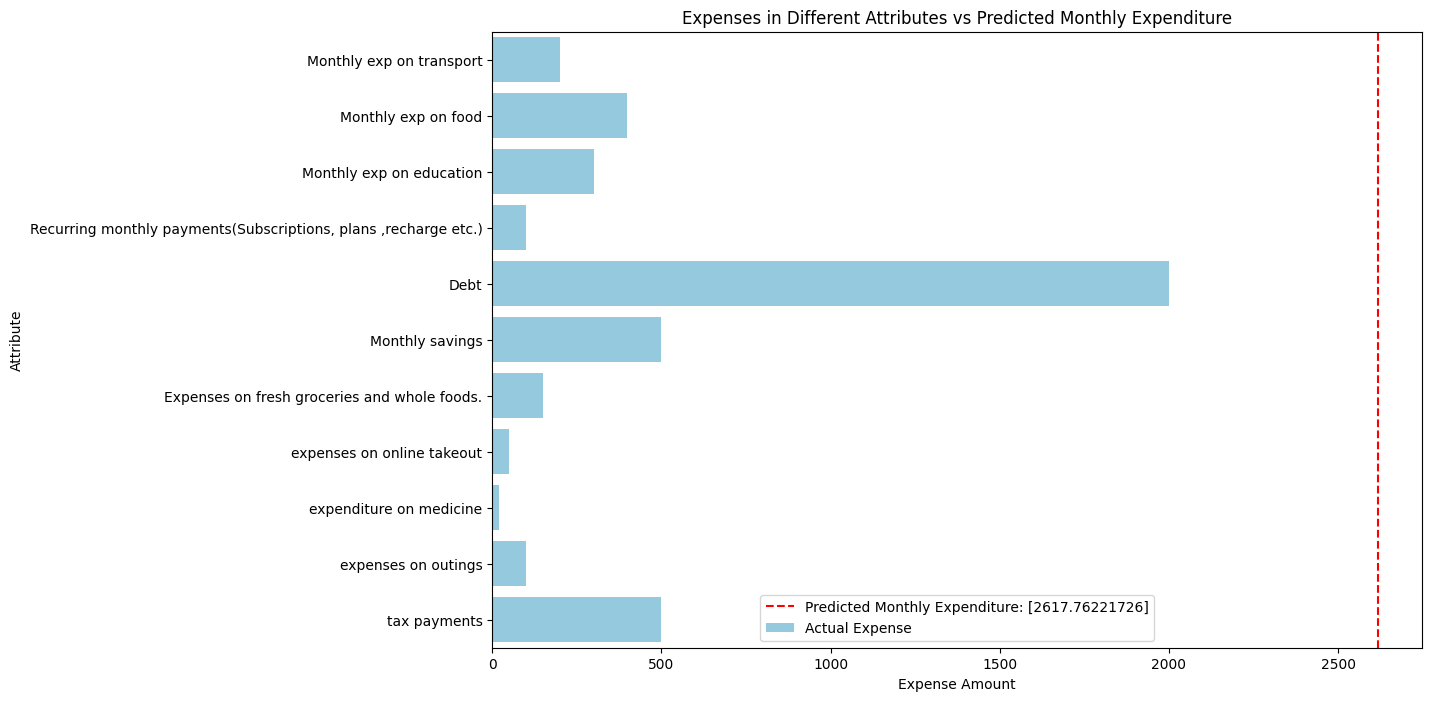

In [22]:
df = pd.DataFrame(list(expenses.items()), columns=['Attribute', 'Expense'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Expense', y='Attribute', data=df, color='skyblue', label='Actual Expense')
plt.axvline(x=predicted_expenditure, color='red', linestyle='--', label=f'Predicted Monthly Expenditure: {predicted_expenditure}')
plt.xlabel('Expense Amount')
plt.ylabel('Attribute')
plt.title('Expenses in Different Attributes vs Predicted Monthly Expenditure')
plt.legend()
plt.show()

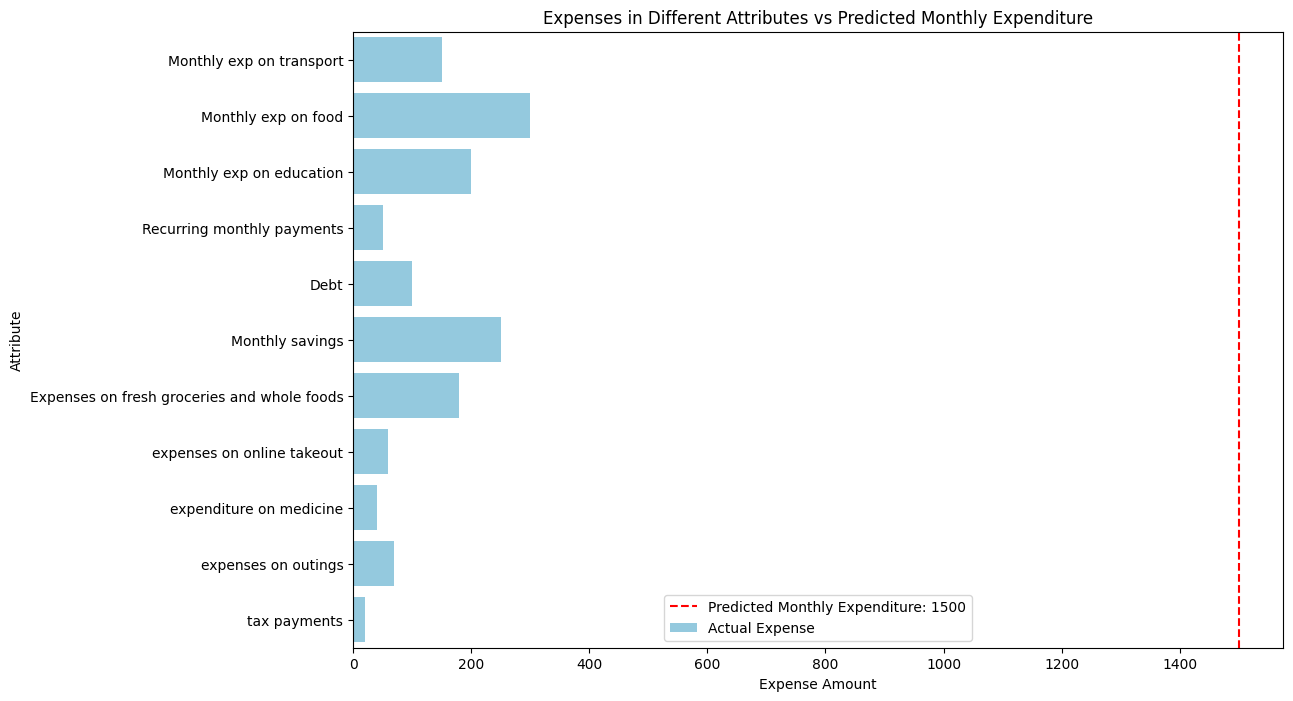

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Attribute': [
        'Monthly exp on transport', 'Monthly exp on food', 'Monthly exp on education', 
        'Recurring monthly payments', 'Debt', 'Monthly savings', 
        'Expenses on fresh groceries and whole foods', 'expenses on online takeout',
        'expenditure on medicine', 'expenses on outings', 'tax payments'
    ],
    'Expense': [
        150, 300, 200, 50, 100, 250, 
        180, 60, 40, 70, 20
    ]
}

# Predicted monthly expenditure
predicted_expenditure = 1500

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Expense', y='Attribute', data=df, color='skyblue', label='Actual Expense')
plt.axvline(x=predicted_expenditure, color='red', linestyle='--', label=f'Predicted Monthly Expenditure: {predicted_expenditure}')
plt.xlabel('Expense Amount')
plt.ylabel('Attribute')
plt.title('Expenses in Different Attributes vs Predicted Monthly Expenditure')
plt.legend()
plt.show()
